### Logistička regresija

Vrijeme je da se upoznamo s jednim od najpoznatijih modela u strojnom učenju. Protivno nazivu logistička regresija je klasifikacijski algoritam te on uopće nema veze s regresijom. No krenimo redom. 

Problem klasifikacije je sljedeći. Za neki podatak $x$ trebamo predvidjeti kojoj klasi $y$ on pripada. Glavna razlike između regresije i klasifikacije je ta da ne postoji uređaj nad klasama. To jest za dvije oznake u regresijskom problemu, možemo reći koja je veća, a koja je manja. Dok kod klasifikacije su klase neki entiteti (primjerice pas ili mačka), te ne možemo reći je li neka klasa veća od neke druge. 

Za početak ćemo se baviti samo binarnom klasifikacijom, to jest imati ćemo samo dvije klase. Te klase ćemo u pravilu označavati s $0$ i $1$ ili s $-1$ i $1$. Često ćemo klasu s oznakom $1$ zvati *pozitivnom*, a klasu s oznakom $0$ ili $-1$ *negativnom*.

Uz ovako definirane oznake postavlja se pitanje zašto jednostavno ne koristit model linearne regresije te naučiti model da pozitivnim primjerima da oznaku $1$, a negativnima $0$. Iako se na prvu ovo čini kao dobra ideja problem je sljedeći. Zamislite da radimo klasifikaciju između mačke i slona te da je slon pozitivna klasa. Težina za značajku težine bi bila pozitivna. Intuitivno što je ta životnija teža mi smo sigurniji da je riječ o slonu. No ako je riječ o stvarno velikom slonu, mi ćemo "preskočiti" jedinicu, te će nam izlaz regresije primjerice biti jednak dva. No zbog kvadratnog gubitka, to će biti jednako krivao kao da smo rekli da je riječ o mački. Time odmah možemo uvidjeti da je kvadratni gubitak kriva vrsta funkcije pogreške za problem klasifikacije.

In [6]:
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression, LogisticRegression

def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);



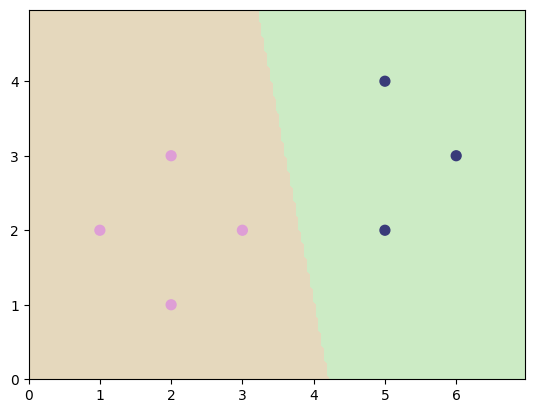

In [7]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

# Vaš kôd ovdje

reg = LinearRegression().fit(seven_X, seven_y)
h = lambda x: reg.predict(x) >= 0.5

plot_2d_clf_problem(seven_X, seven_y, h)


[ 0.67600701  0.98423818  1.03152364  0.62872154  0.22591944  0.53415061
  0.17863398 -0.2591944 ]


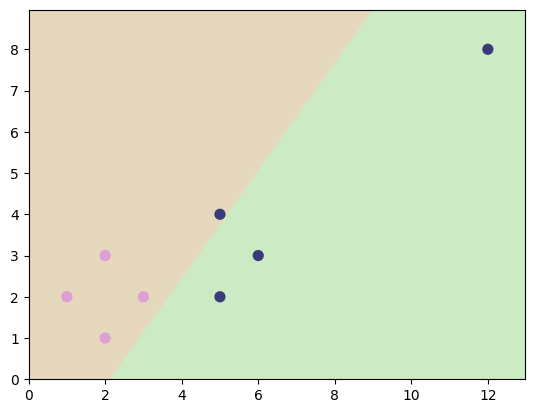

In [8]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

clf = LinearRegression().fit(outlier_X, outlier_y)
y_pred = clf.predict(outlier_X)
h = lambda x: clf.predict(x) >= 0.5

plot_2d_clf_problem(outlier_X, outlier_y, h)
print(y_pred)

In [9]:
def make_quad(n_per_quad=10, centers=None, center_labels=None, cov_matrix=None):
    if centers is None:
        centers = np.array([
            [1,1],
            [1,4],
            [4,4],
            [4,1]
        ])

    if center_labels is None:
        center_labels = [0,1,0,1]


    if cov_matrix is None:
        cov_matrix = [[0.2, 0], [0, 0.2]]

    X, y = [], []
    for center, label in zip(centers, center_labels):
        points = np.random.multivariate_normal(mean=center,cov=cov_matrix, size=n_per_quad)
        X.append(points)
        y.extend([label] * n_per_quad)

    X = np.vstack(X)
    y = np.array(y)

    return X,y  

(20, 2)
[[ 1.06772813e-02  8.28718258e-01]
 [ 3.19216868e-02  9.99490373e-01]
 [ 3.37898463e-02  9.98245140e-01]
 [ 1.00898918e-03  6.53900879e-01]
 [ 5.18722032e-05  8.42886394e-01]
 [ 6.80323885e-07  4.74983134e-04]
 [ 9.81943516e-05  2.07326467e-03]
 [ 5.47591384e-04  4.86206729e-03]
 [ 4.97584708e-04  6.30050101e-03]
 [ 1.33251678e-03  1.63493425e-02]
 [ 8.80700087e-04  6.05978860e-06]
 [ 1.82959544e-03 -4.66982513e-05]
 [ 1.65821593e-03 -1.74592146e-05]
 [ 2.55636684e-03 -2.11630970e-05]
 [ 7.24344214e-04 -9.16696600e-06]
 [ 1.28596405e-01 -4.02870018e-03]
 [ 8.53174571e-01  7.98770042e-03]
 [ 1.93632406e-01 -5.99566708e-03]
 [ 9.99490373e-01  3.19216868e-02]
 [ 9.02595857e-01  1.37814466e-02]]
[[1.17683468 0.58394137]
 [3.51992221 0.70058325]]
0.55
0.75


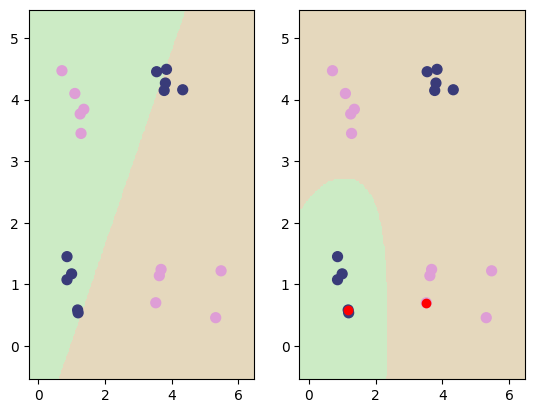

In [58]:
from sklearn.kernel_approximation import Nystroem

X, y = make_quad(5)

rbf = Nystroem(n_components=3)

phi = rbf.fit_transform(X)

print(phi.shape)
print(phi)
picked = X[np.max(phi, axis=1) > 0.999]
print(picked)
model_1 = LogisticRegression()
model_2 = LogisticRegression()

model_1.fit(X,y)
model_2.fit(phi, y)

print(model_1.score(X,y))
print(model_2.score(phi,y))

plt.subplot(1,2,1)
plot_2d_clf_problem(X, y, lambda x: model_1.predict(x) > 0.5)
plt.subplot(1,2,2)
plot_2d_clf_problem(X, y, lambda x: model_2.predict(rbf.transform(x)) > 0.5)
plt.scatter(picked[:,0], picked[:,1], c='red')


